In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import csv

In [25]:
row_start = 14

In [26]:
metadata = dict()
filename = "1A.CSV"
with open(filename, newline='') as csvfile:
    reader = csv.reader(csvfile)
    for (i, row) in enumerate(reader):
        if i > row_start: break
        if len(row) >= 2: metadata[row[0]] = row[1]
metadata

{'Model': 'MSO2024B',
 'Firmware Version': '1.56',
 'Point Format': 'Y',
 'Horizontal Units': 'S',
 'Horizontal Scale': '0.4',
 'Sample Interval': '3.2e-05',
 'Filter Frequency': '2e+08',
 'Record Length': '125000',
 'Gating': '0.0% to 100.0%',
 'Probe Attenuation': '1',
 'Vertical Units': 'V',
 'Vertical Offset': '0',
 'Vertical Scale': '2',
 'Label': ''}

In [27]:
data = pd.read_csv(filename, delimiter=",", header=row_start)
data

,TIME,CH1,CH1 Peak Detect,CH2,CH2 Peak Detect
0,-2.00000,9.92,1.008000e+01,9.92,10.00
1,-1.99997,9.92,9.840000e+00,9.92,9.76
2,-1.99994,9.92,1.008000e+01,9.92,10.00
3,-1.99990,9.92,9.840000e+00,9.92,9.76
4,-1.99987,9.92,1.008000e+01,9.92,10.00
...,...,...,...,...,...
124995,1.99984,0.08,-8.583070e-08,0.16,0.08
124996,1.99987,0.08,1.600000e-01,0.16,0.32
124997,1.99990,0.08,-8.583070e-08,0.16,0.08
124998,1.99994,0.08,2.400000e-01,0.16,0.24


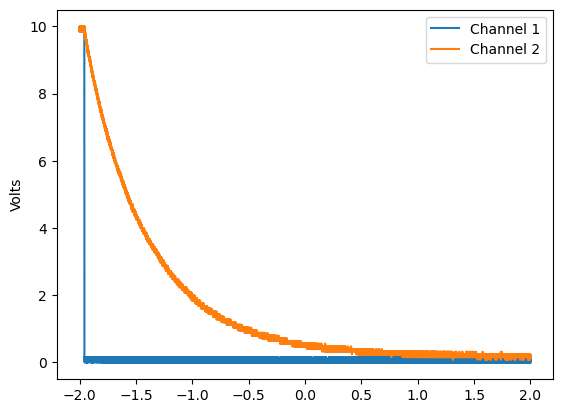

In [28]:
t_raw = data["TIME"]
ch1_raw = data["CH1"]
ch2_raw = data["CH2"]
plt.plot(
    t_raw, 
    ch1_raw,
    label="Channel 1"
)
plt.plot(
    t_raw, 
    ch2_raw,
    label="Channel 2"
)
plt.ylabel("Volts")
plt.legend()

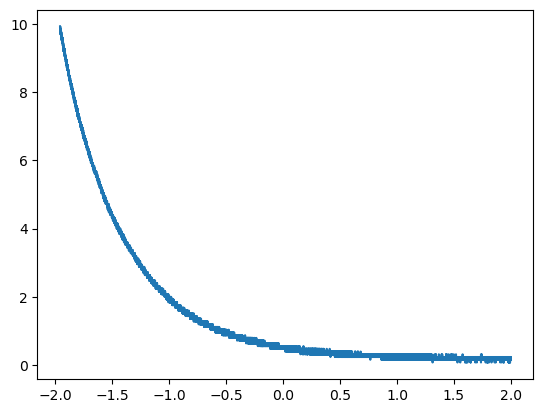

In [29]:
t = t_raw[ch1_raw < 1]
ch2 = ch2_raw[ch1_raw < 1]
plt.plot(t, ch2)

In [30]:
model = lambda t, A, RC, z: A * np.exp(-t/RC) + z
[A_model, RC_model, z_model], cov = sp.optimize.curve_fit(model, t, ch2)
cov

array([[ 1.22322987e-08,  7.25674426e-09, -1.31702358e-08],
       [ 7.25674426e-09,  4.39632823e-09, -7.26830895e-09],
       [-1.31702358e-08, -7.26830895e-09,  3.11082270e-08]])

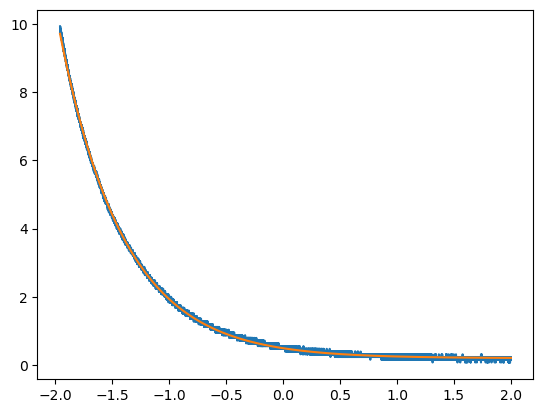

In [31]:
plt.plot(t, ch2)
plt.plot(t, model(t, A_model, RC_model, z_model))
